In [4]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


In [89]:
listings = pd.read_csv('data/listings.csv.gz', compression='gzip')

In [90]:
listings['price'] = listings['price'].str.replace('$', '').str.replace(',', '').astype(float)

In [95]:
listings_expensive = listings[listings['price']>listings['price'].quantile(0.9)]
listings_cheap = listings[listings['price']<listings['price'].quantile(0.1)]

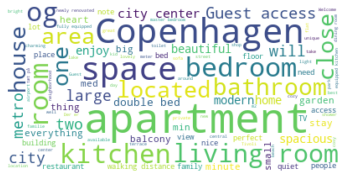

In [98]:
text = " ".join(listings_expensive['description'].fillna("").to_list())
text_expensive = text.replace('<br />', ' ').replace('<b>',' ').replace('</b>',' ')

# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text_expensive)

# Display the generated image:
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

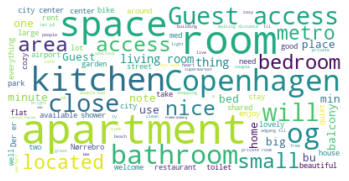

In [99]:
text = " ".join(listings_cheap['description'].fillna("").to_list())
text_cheap = text.replace('<br />', ' ').replace('<b>',' ').replace('</b>',' ')

# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text_cheap)

# Display the generated image:
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()